In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('aportes_colectivoscd.csv', sep=';')
df.head()

,mes,provincia,municipio,cuit,tipo,monto
0,03/2020,30-64701983-4,BUENOS AIRES,ALMIRANTE BROWN,910000.0,Comp. Gasoil
1,03/2020,30-65080001-6,BUENOS AIRES,ALMIRANTE BROWN,3230000.0,Comp. Gasoil
2,03/2020,30-68586179-4,BUENOS AIRES,ALMIRANTE BROWN,2480000.0,Comp. Gasoil
3,03/2020,30-71596259-0,BUENOS AIRES,ALMIRANTE BROWN,2170000.0,Comp. Gasoil
4,03/2020,33-54634565-9,BUENOS AIRES,ALMIRANTE BROWN,330000.0,Comp. Gasoil


las columnas estan desordenadas, vamos a colocarle el nombre correcto a cada columna

In [3]:
df.columns=['mes','cuit','provincia','municipio','monto','tipo']

Ahora podemos ver si hay filas duplicadas y si las hay podemos eliminarlas, para que no haya un sesgo en los posibles estudios futuros.

In [4]:
df=df.drop_duplicates()
df.duplicated().sum()

0

Podemos hacer lo mismo con las filas con datos nulos, veremos si hay alguno.

In [5]:
df.isna().sum()

mes          0
cuit         0
provincia    0
municipio    0
monto        0
tipo         0
dtype: int64

Vemos que no hay ningun nulo en ninguna de las columnas, excelente!

Ahora lo que podemos hacer es ver los tipos de datos y por ejemplo cambiar la columna mes a tipo fecha si no lo es aún.

In [6]:
df.dtypes

mes           object
cuit          object
provincia     object
municipio     object
monto        float64
tipo          object
dtype: object

Perfecto, vamos a cambiar la columna mes a fecha

In [7]:
df['mes'] = pd.to_datetime(df['mes'], format='%m/%Y')
df.dtypes

mes          datetime64[ns]
cuit                 object
provincia            object
municipio            object
monto               float64
tipo                 object
dtype: object

Bien, ya que tenemos los datos completos, no duplicados y con los tipos correspondientes, vamos a poder empezar a hacer el analisis exploratorio. Primero veamos cuantas entradas hay por provincia, para ver que podemos estudiar sobre esto.

In [8]:
df['provincia'].value_counts()

provincia
BUENOS AIRES           12755
C.A.B.A.               10295
CORDOBA                 5262
MISIONES                3999
TUCUMAN                 3744
SANTA FE                3520
ENTRE RIOS              2777
JUJUY                   1888
CATAMARCA               1780
JN                      1680
CHACO                   1675
CORRIENTES              1490
SANTIAGO DEL ESTERO     1320
SALTA                   1190
MENDOZA                 1165
NEUQUEN                 1142
CHUBUT                  1060
LA PAMPA                1041
RIO NEGRO                848
SAN LUIS                 710
SAN JUAN                 631
LA RIOJA                 576
SANTA CRUZ               360
FORMOSA                  167
TIERRA DEL FUEGO         103
Name: count, dtype: int64

No hay sorpresas en cuanto a que Buenos Aires y CABA tengan mayor cantidad de filas. Es interesante que misiones tiene una gran cantidad de filas. Podemos ver que estan todas las provincias, pero hay algo extraño, ¿que es 'JN'? no hay ninguna provincia que tenga ni siquiera esas iniciales. Vamos a ver que municipios hay en las filas que tienen como provincia JN

In [9]:
JN=df.loc[df['provincia']=='JN']
JN

,mes,cuit,provincia,municipio,monto,tipo
162,2020-03-01,30-52276217-9,JN,JN,14750000.00,Comp. Gasoil
163,2020-03-01,30-54563704-5,JN,JN,2980000.00,Comp. Gasoil
164,2020-03-01,30-54563704-5,JN,JN,1620000.00,Comp. Gasoil
165,2020-03-01,30-54563704-5,JN,JN,3080000.00,Comp. Gasoil
166,2020-03-01,30-54563704-5,JN,JN,6250000.00,Comp. Gasoil
...,...,...,...,...,...,...
61292,2017-01-01,30-68784108-1,JN,JN,0.00,Comp. Gasoil
61293,2017-01-01,33-54625963-9,JN,JN,1040853.00,Comp. Gasoil
61294,2017-01-01,33-54625963-9,JN,JN,58530.60,Comp. Gasoil
61295,2017-01-01,33-54625963-9,JN,JN,1558731.25,Comp. Gasoil


In [10]:
df

,mes,cuit,provincia,municipio,monto,tipo
0,2020-03-01,30-64701983-4,BUENOS AIRES,ALMIRANTE BROWN,910000.00,Comp. Gasoil
1,2020-03-01,30-65080001-6,BUENOS AIRES,ALMIRANTE BROWN,3230000.00,Comp. Gasoil
2,2020-03-01,30-68586179-4,BUENOS AIRES,ALMIRANTE BROWN,2480000.00,Comp. Gasoil
3,2020-03-01,30-71596259-0,BUENOS AIRES,ALMIRANTE BROWN,2170000.00,Comp. Gasoil
4,2020-03-01,33-54634565-9,BUENOS AIRES,ALMIRANTE BROWN,330000.00,Comp. Gasoil
...,...,...,...,...,...,...
62234,2017-01-01,30-71248519-8,TUCUMAN,SAN MIGUEL DE TUCUMAN,3177529.22,Comp. Tarifaria
62235,2017-01-01,33-54565229-9,TUCUMAN,SAN MIGUEL DE TUCUMAN,2894401.81,Comp. Tarifaria
62236,2017-01-01,33-54565229-9,TUCUMAN,SAN MIGUEL DE TUCUMAN,434695.65,Comp. Gasoil
62237,2017-01-01,33-70799632-9,TUCUMAN,SAN MIGUEL DE TUCUMAN,431681.69,Comp. Gasoil


Bien, al parecer todos los municipios en JN tambien tienen el mismo nombre, JN. Por otro lado vemos que son solo 1680 entradas, por lo que representa casi el 2% de las entradas del dataframe. Veamos que cantidad de subsidios hemos destinado a 'JN'

In [11]:
JN['monto'].sum()

5648953765.65

Es una cantidad enorme de dinero. ¿Esto sera un error? Proximamente podemos hacer mas estudios al respecto, por el momento, como no hay una provincia que se llame JN vamos a descartarla en el dataframe original, de cualquier manera despues del estudio vamos a volver a sumar estos datos para ver si hay algun cambio significativo.

In [12]:
dfnuevo = df[df['provincia'] != 'JN']
dfnuevo

,mes,cuit,provincia,municipio,monto,tipo
0,2020-03-01,30-64701983-4,BUENOS AIRES,ALMIRANTE BROWN,910000.00,Comp. Gasoil
1,2020-03-01,30-65080001-6,BUENOS AIRES,ALMIRANTE BROWN,3230000.00,Comp. Gasoil
2,2020-03-01,30-68586179-4,BUENOS AIRES,ALMIRANTE BROWN,2480000.00,Comp. Gasoil
3,2020-03-01,30-71596259-0,BUENOS AIRES,ALMIRANTE BROWN,2170000.00,Comp. Gasoil
4,2020-03-01,33-54634565-9,BUENOS AIRES,ALMIRANTE BROWN,330000.00,Comp. Gasoil
...,...,...,...,...,...,...
62234,2017-01-01,30-71248519-8,TUCUMAN,SAN MIGUEL DE TUCUMAN,3177529.22,Comp. Tarifaria
62235,2017-01-01,33-54565229-9,TUCUMAN,SAN MIGUEL DE TUCUMAN,2894401.81,Comp. Tarifaria
62236,2017-01-01,33-54565229-9,TUCUMAN,SAN MIGUEL DE TUCUMAN,434695.65,Comp. Gasoil
62237,2017-01-01,33-70799632-9,TUCUMAN,SAN MIGUEL DE TUCUMAN,431681.69,Comp. Gasoil


In [13]:
dfnuevo['mes'].value_counts()

mes
2017-01-01    2277
2017-02-01    2275
2017-04-01    2267
2017-03-01    2266
2017-05-01    2259
2017-06-01    2246
2017-09-01    2191
2017-10-01    2188
2017-07-01    2187
2017-08-01    2186
2017-12-01    2184
2017-11-01    2182
2018-01-01    2177
2018-05-01    2174
2018-04-01    2172
2018-02-01    2170
2018-09-01    2169
2018-07-01    2167
2018-06-01    2167
2018-08-01    2167
2018-03-01    2164
2018-10-01    2159
2018-11-01    2151
2018-12-01    2148
2019-01-01    1450
2019-02-01    1446
2019-03-01     697
2019-04-01     690
2019-05-01     682
2019-06-01     378
2019-07-01     164
2019-11-01     163
2019-08-01     163
2019-09-01     163
2019-10-01     163
2020-02-01     162
2020-03-01     162
2019-12-01     161
2020-01-01     161
Name: count, dtype: int64

In [14]:
dfnuevo["año"] = dfnuevo["mes"].dt.year
dfnuevo["mes"] = dfnuevo["mes"].dt.month
dfnuevo

/tmp/ipykernel_5893/4057111752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnuevo["año"] = dfnuevo["mes"].dt.year
/tmp/ipykernel_5893/4057111752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnuevo["mes"] = dfnuevo["mes"].dt.month


,mes,cuit,provincia,municipio,monto,tipo,año
0,3,30-64701983-4,BUENOS AIRES,ALMIRANTE BROWN,910000.00,Comp. Gasoil,2020
1,3,30-65080001-6,BUENOS AIRES,ALMIRANTE BROWN,3230000.00,Comp. Gasoil,2020
2,3,30-68586179-4,BUENOS AIRES,ALMIRANTE BROWN,2480000.00,Comp. Gasoil,2020
3,3,30-71596259-0,BUENOS AIRES,ALMIRANTE BROWN,2170000.00,Comp. Gasoil,2020
4,3,33-54634565-9,BUENOS AIRES,ALMIRANTE BROWN,330000.00,Comp. Gasoil,2020
...,...,...,...,...,...,...,...
62234,1,30-71248519-8,TUCUMAN,SAN MIGUEL DE TUCUMAN,3177529.22,Comp. Tarifaria,2017
62235,1,33-54565229-9,TUCUMAN,SAN MIGUEL DE TUCUMAN,2894401.81,Comp. Tarifaria,2017
62236,1,33-54565229-9,TUCUMAN,SAN MIGUEL DE TUCUMAN,434695.65,Comp. Gasoil,2017
62237,1,33-70799632-9,TUCUMAN,SAN MIGUEL DE TUCUMAN,431681.69,Comp. Gasoil,2017


In [15]:
dfnuevo=dfnuevo[['cuit','provincia','municipio','monto','tipo','mes','año']]
dfnuevo

,cuit,provincia,municipio,monto,tipo,mes,año
0,30-64701983-4,BUENOS AIRES,ALMIRANTE BROWN,910000.00,Comp. Gasoil,3,2020
1,30-65080001-6,BUENOS AIRES,ALMIRANTE BROWN,3230000.00,Comp. Gasoil,3,2020
2,30-68586179-4,BUENOS AIRES,ALMIRANTE BROWN,2480000.00,Comp. Gasoil,3,2020
3,30-71596259-0,BUENOS AIRES,ALMIRANTE BROWN,2170000.00,Comp. Gasoil,3,2020
4,33-54634565-9,BUENOS AIRES,ALMIRANTE BROWN,330000.00,Comp. Gasoil,3,2020
...,...,...,...,...,...,...,...
62234,30-71248519-8,TUCUMAN,SAN MIGUEL DE TUCUMAN,3177529.22,Comp. Tarifaria,1,2017
62235,33-54565229-9,TUCUMAN,SAN MIGUEL DE TUCUMAN,2894401.81,Comp. Tarifaria,1,2017
62236,33-54565229-9,TUCUMAN,SAN MIGUEL DE TUCUMAN,434695.65,Comp. Gasoil,1,2017
62237,33-70799632-9,TUCUMAN,SAN MIGUEL DE TUCUMAN,431681.69,Comp. Gasoil,1,2017


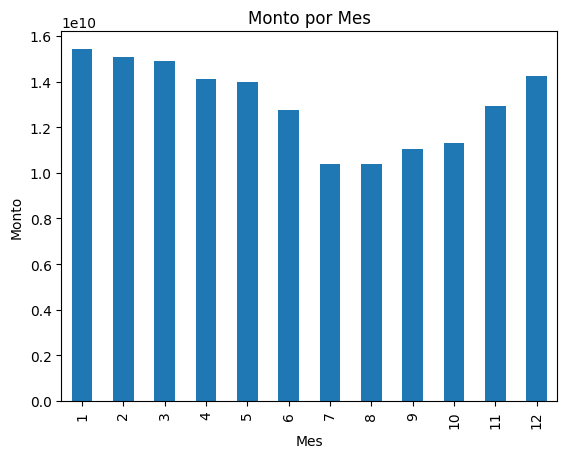

In [16]:
# Agrupar por mes y sumar los montos
agrupado = dfnuevo.groupby('mes')['monto'].sum()
agrupadoyr = dfnuevo.groupby('año')['monto'].sum()

# Crear un gráfico de barras
agrupado.plot(kind='bar')
plt.xlabel('Mes')
plt.ylabel('Monto')
plt.title('Monto por Mes')
#plt.xticks(range(1, 13), [str(i) for i in range(1, 13)])
plt.show()


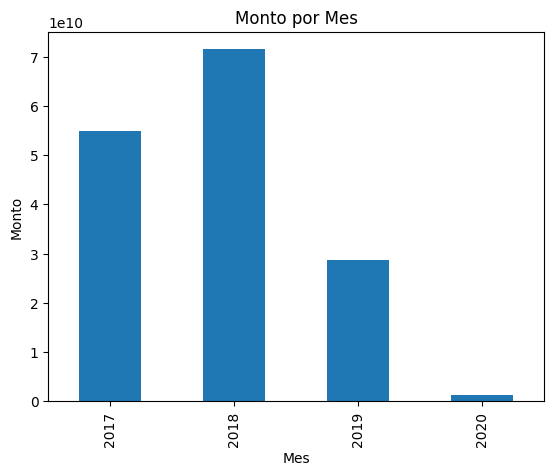

In [17]:
# Crear un gráfico de barras
agrupadoyr.plot(kind='bar')
plt.xlabel('Mes')
plt.ylabel('Monto')
plt.title('Monto por Mes')
#plt.xticks(range(1, 13), [str(i) for i in range(1, 13)])
plt.show()

In [18]:
# Agrupa por provincia y municipio y suma los montos
subsidios_por_provincia_municipio = dfnuevo.groupby(['provincia', 'municipio'])['monto'].sum().reset_index()

# Visualiza el resumen de montos por provincia y municipio
print(subsidios_por_provincia_municipio)

        provincia              municipio         monto
0    BUENOS AIRES        ALMIRANTE BROWN  1.230240e+09
1    BUENOS AIRES              ARRECIFES  6.107460e+06
2    BUENOS AIRES             AVELLANEDA  2.258939e+08
3    BUENOS AIRES                   AZUL  4.020740e+07
4    BUENOS AIRES           BAHIA BLANCA  7.326890e+08
..            ...                    ...           ...
213       TUCUMAN              AGUILARES  6.202742e+05
214       TUCUMAN     BANDA DEL RIO SALI  1.415121e+07
215       TUCUMAN             CONCEPCION  2.039213e+07
216       TUCUMAN                   PROV  2.240220e+09
217       TUCUMAN  SAN MIGUEL DE TUCUMAN  1.236252e+09

[218 rows x 3 columns]


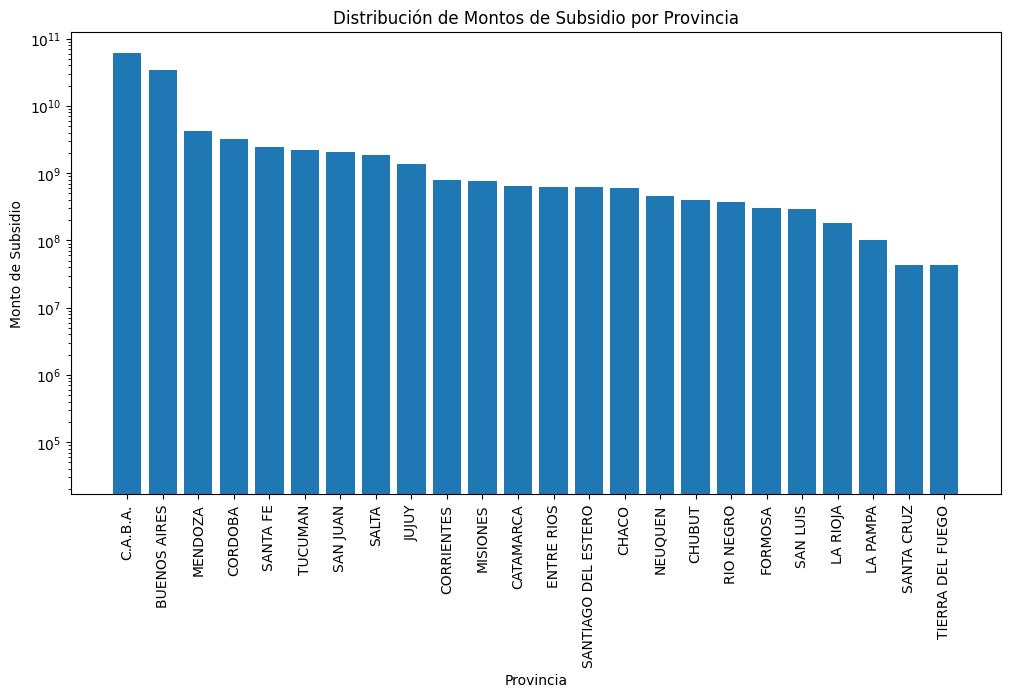

In [19]:
# Ordena los datos por monto descendente para mostrar los principales beneficiarios
subsidios_por_provincia_municipio = subsidios_por_provincia_municipio.sort_values(by='monto', ascending=False)

# Crea un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(subsidios_por_provincia_municipio['provincia'], subsidios_por_provincia_municipio['monto'])
plt.xticks(rotation=90)
plt.yscale('log')  # Configura el eje Y en escala logarítmica
plt.xlabel('Provincia')
plt.ylabel('Monto de Subsidio')
plt.title('Distribución de Montos de Subsidio por Provincia')
plt.show()

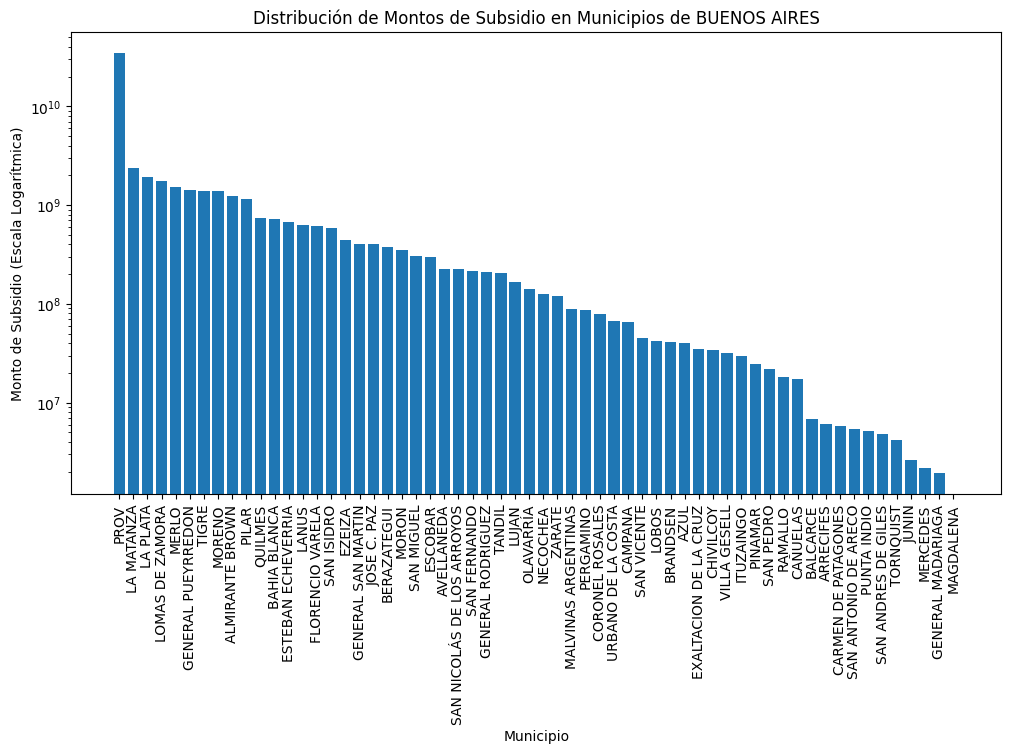

In [20]:
# Filtra los datos para que solo incluyan la provincia 'BUENOS AIRES'
subsidios_buenos_aires = subsidios_por_provincia_municipio[subsidios_por_provincia_municipio['provincia'] == 'BUENOS AIRES']

# Ordena los datos por monto descendente para mostrar los principales beneficiarios
subsidios_buenos_aires = subsidios_buenos_aires.sort_values(by='monto', ascending=False)

# Crea un gráfico de barras con eje Y en escala logarítmica
plt.figure(figsize=(12, 6))
plt.bar(subsidios_buenos_aires['municipio'], subsidios_buenos_aires['monto'])
plt.xticks(rotation=90)
plt.yscale('log')  # Configura el eje Y en escala logarítmica
plt.xlabel('Municipio')
plt.ylabel('Monto de Subsidio (Escala Logarítmica)')
plt.title('Distribución de Montos de Subsidio en Municipios de BUENOS AIRES')
plt.show()


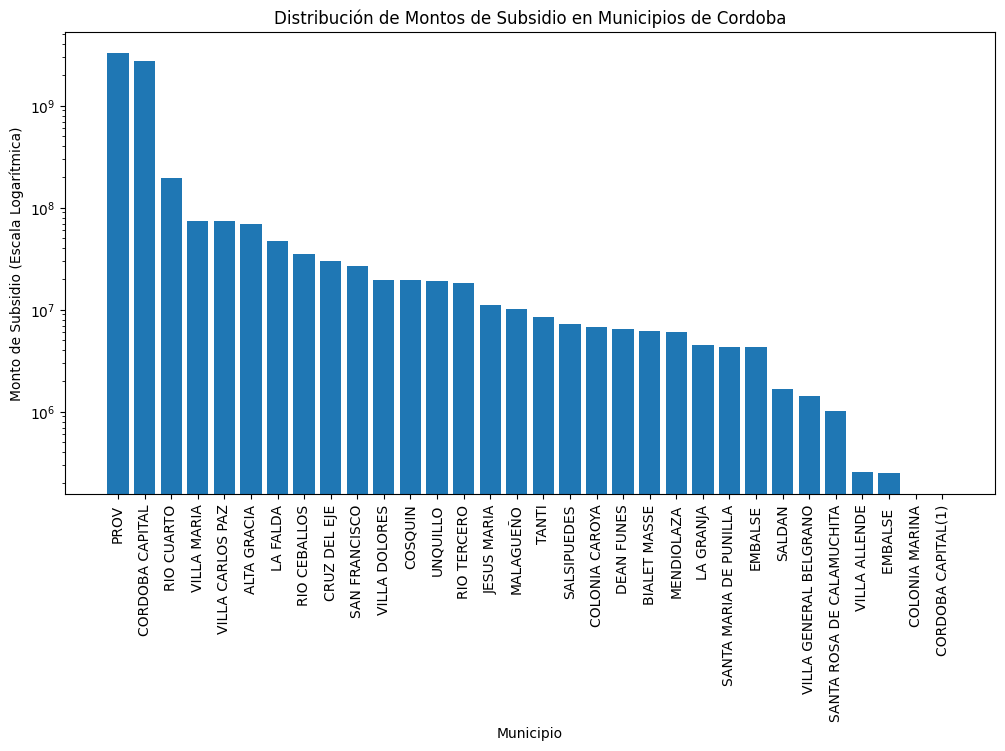

In [21]:
# Filtra los datos para que solo incluyan la provincia 'BUENOS AIRES'
subsidios_buenos_aires = subsidios_por_provincia_municipio[subsidios_por_provincia_municipio['provincia'] == 'CORDOBA']

# Ordena los datos por monto descendente para mostrar los principales beneficiarios
subsidios_buenos_aires = subsidios_buenos_aires.sort_values(by='monto', ascending=False)

# Crea un gráfico de barras con eje Y en escala logarítmica
plt.figure(figsize=(12, 6))
plt.bar(subsidios_buenos_aires['municipio'], subsidios_buenos_aires['monto'])
plt.xticks(rotation=90)
plt.yscale('log')  # Configura el eje Y en escala logarítmica
plt.xlabel('Municipio')
plt.ylabel('Monto de Subsidio (Escala Logarítmica)')
plt.title('Distribución de Montos de Subsidio en Municipios de Cordoba')
plt.show()

/tmp/ipykernel_5893/3552157847.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='monto', y='municipio', data=subsidios_buenos_aires, ci=None, palette="Blues_d")
/tmp/ipykernel_5893/3552157847.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='monto', y='municipio', data=subsidios_buenos_aires, ci=None, palette="Blues_d")


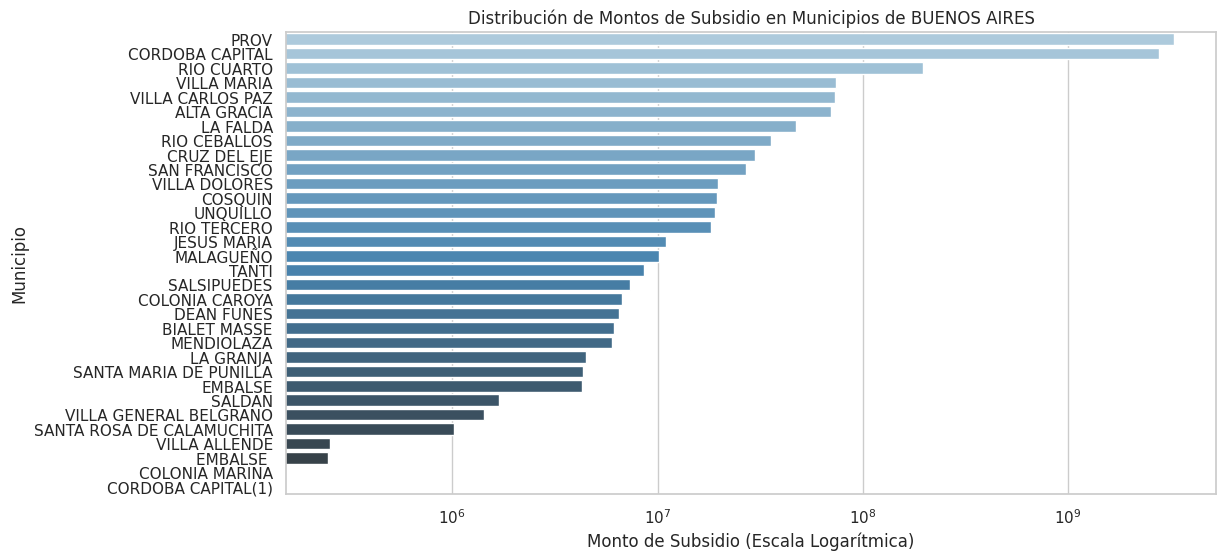

In [22]:
# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Crea un gráfico de barras utilizando Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='monto', y='municipio', data=subsidios_buenos_aires, ci=None, palette="Blues_d")
plt.xscale('log')  # Configura el eje X en escala logarítmica
plt.xlabel('Monto de Subsidio (Escala Logarítmica)')
plt.ylabel('Municipio')
plt.title('Distribución de Montos de Subsidio en Municipios de BUENOS AIRES')
plt.show()

 Identificación de los principales beneficiarios (CUIT):

Encuentra las entidades (por CUIT) que reciben la mayor cantidad de subsidios y analiza su distribución geográfica y su evolución a lo largo del tiempo.

In [23]:
# Agrupa por CUIT y suma los montos
subsidios_por_cuit = dfnuevo.groupby('cuit')['monto'].sum().reset_index()

# Ordena los datos por monto descendente para identificar las principales beneficiarias
subsidios_por_cuit = subsidios_por_cuit.sort_values(by='monto', ascending=False)

# Muestra las principales beneficiarias
print(subsidios_por_cuit.head())

              cuit         monto
652  30-70778883-2  4.011393e+09
247  30-54622896-3  3.599995e+09
377  30-54650008-6  3.019349e+09
211  30-52276217-9  2.684096e+09
887  33-54634954-9  2.493025e+09


In [24]:
# Fusiona los datos con la ubicación geográfica del conjunto de datos original
subsidios_con_ubicacion = pd.merge(subsidios_por_cuit, dfnuevo[['cuit', 'provincia', 'municipio']], on='cuit')

# Muestra las ubicaciones de las principales beneficiarias
print(subsidios_con_ubicacion.head())

            cuit         monto provincia municipio
0  30-70778883-2  4.011393e+09  C.A.B.A.  C.A.B.A.
1  30-70778883-2  4.011393e+09  C.A.B.A.  C.A.B.A.
2  30-70778883-2  4.011393e+09  C.A.B.A.  C.A.B.A.
3  30-70778883-2  4.011393e+09  C.A.B.A.  C.A.B.A.
4  30-70778883-2  4.011393e+09  C.A.B.A.  C.A.B.A.


In [43]:
# Agrupa por CUIT y mes, y suma los montos
subsidios_temporales = dfnuevo.groupby(['cuit', 'mes'])['monto'].sum().reset_index()

# Fusiona los datos con la ubicación geográfica
subsidios_temporales = pd.merge(subsidios_temporales, dfnuevo[['cuit', 'provincia', 'municipio']], on='cuit')

# Muestra la evolución temporal de los subsidios para las principales beneficiarias
print(subsidios_temporales.head())

            cuit  mes      monto     provincia municipio
0  20-01143816-5    1  410997.95  BUENOS AIRES      PROV
1  20-01143816-5    1  410997.95  BUENOS AIRES      PROV
2  20-01143816-5    1  410997.95  BUENOS AIRES      PROV
3  20-01143816-5    1  410997.95  BUENOS AIRES      PROV
4  20-01143816-5    1  410997.95  BUENOS AIRES      PROV


/tmp/ipykernel_5893/3802717634.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='monto', y='cuit', data=subsidios_por_cuit.head(10), ci=None, palette="Blues_d")
/tmp/ipykernel_5893/3802717634.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='monto', y='cuit', data=subsidios_por_cuit.head(10), ci=None, palette="Blues_d")


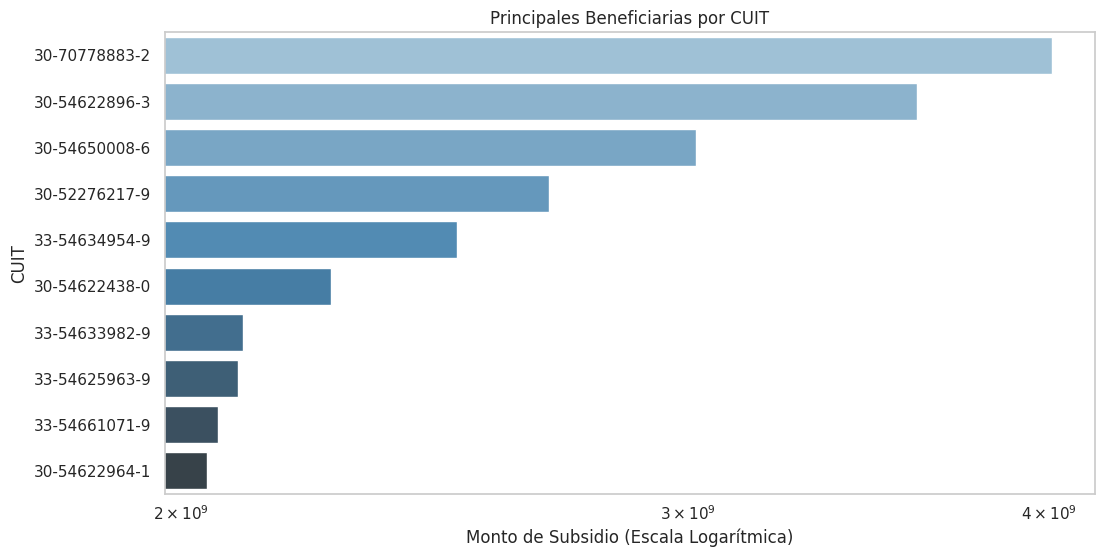

In [44]:
# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Crea un gráfico de barras horizontales con las principales beneficiarias por CUIT
plt.figure(figsize=(12, 6))
sns.barplot(x='monto', y='cuit', data=subsidios_por_cuit.head(10), ci=None, palette="Blues_d")
plt.xscale('log')  # Configura el eje X en escala logarítmica
plt.xlabel('Monto de Subsidio (Escala Logarítmica)')
plt.ylabel('CUIT')
plt.title('Principales Beneficiarias por CUIT')
plt.show()

/tmp/ipykernel_5893/4168465687.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='provincia', y='municipio', size='monto', data=subsidios_con_ubicacion, sizes=(20, 200), palette="Blues")


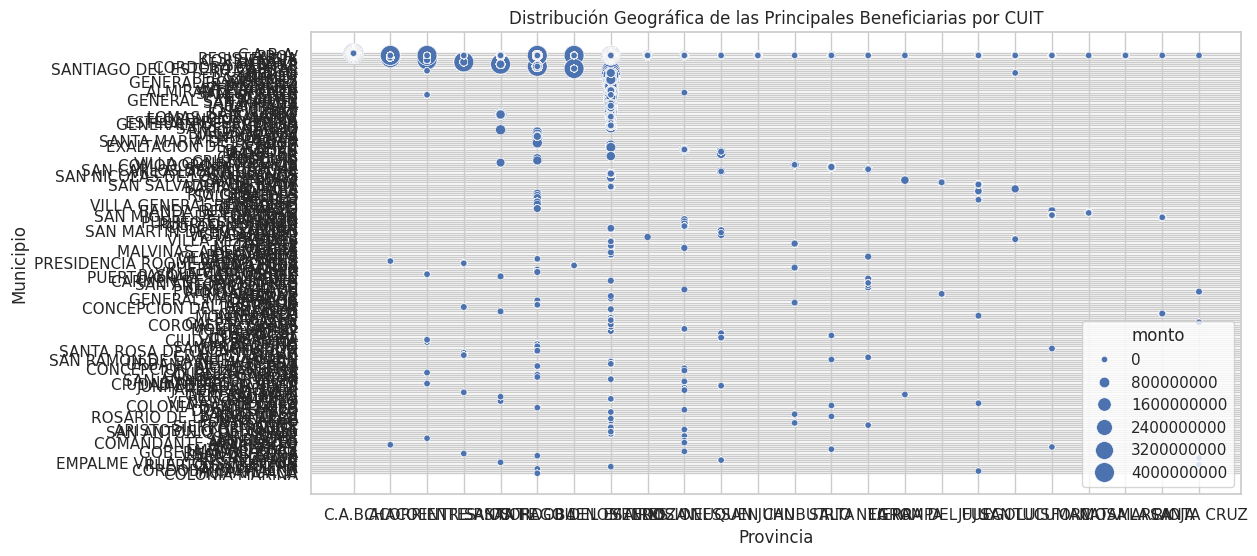

In [45]:

# Crea un mapa de dispersión para visualizar la distribución geográfica de las principales beneficiarias
plt.figure(figsize=(12, 6))
sns.scatterplot(x='provincia', y='municipio', size='monto', data=subsidios_con_ubicacion, sizes=(20, 200), palette="Blues")
plt.xlabel('Provincia')
plt.ylabel('Municipio')
plt.title('Distribución Geográfica de las Principales Beneficiarias por CUIT')
plt.show()

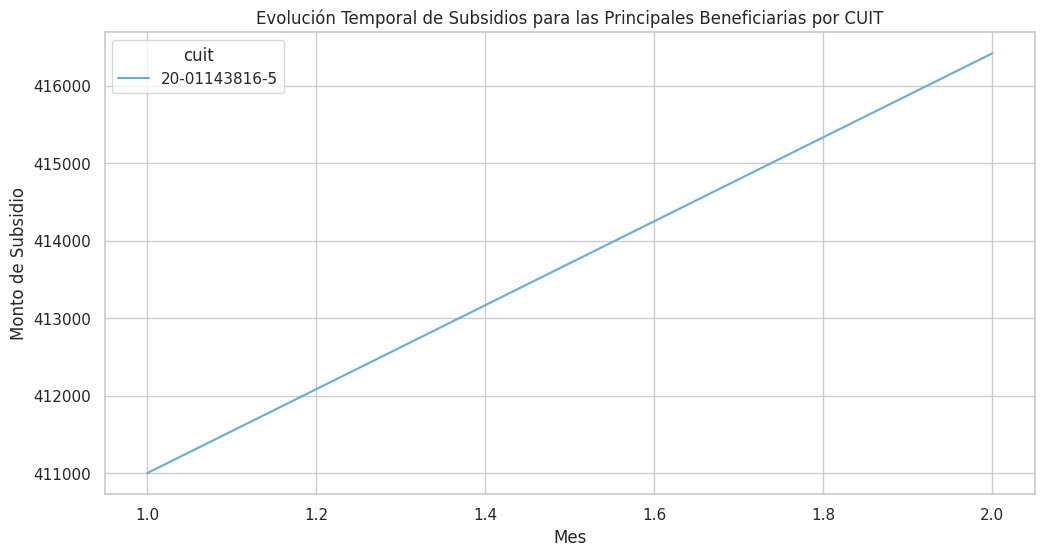

In [46]:
# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Crea un gráfico de líneas para mostrar la evolución temporal de los subsidios para las principales beneficiarias
plt.figure(figsize=(12, 6))
sns.lineplot(x='mes', y='monto', hue='cuit', data=subsidios_temporales.head(100), palette="Blues")
plt.xlabel('Mes')
plt.ylabel('Monto de Subsidio')
plt.title('Evolución Temporal de Subsidios para las Principales Beneficiarias por CUIT')
plt.show()

In [47]:
# Agrupa por mes y suma los montos
subsidios_por_mes = dfnuevo.groupby('mes')['monto'].sum().reset_index()

# Visualiza el resumen de montos por mes
print(subsidios_por_mes)

    mes         monto
0     1  1.543166e+10
1     2  1.508361e+10
2     3  1.490339e+10
3     4  1.411593e+10
4     5  1.396804e+10
5     6  1.274133e+10
6     7  1.038190e+10
7     8  1.040403e+10
8     9  1.104972e+10
9    10  1.132618e+10
10   11  1.291048e+10
11   12  1.424155e+10


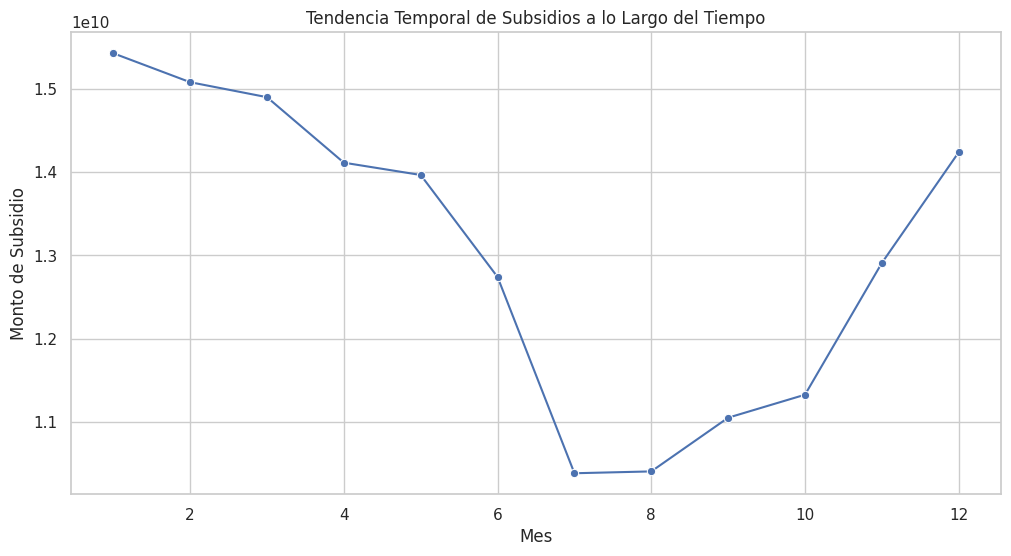

In [48]:
# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Crea un gráfico de líneas para mostrar la tendencia temporal de los subsidios
plt.figure(figsize=(12, 6))
sns.lineplot(x='mes', y='monto', data=subsidios_por_mes, marker='o', color='b')
plt.xlabel('Mes')
plt.ylabel('Monto de Subsidio')
plt.title('Tendencia Temporal de Subsidios a lo Largo del Tiempo')
plt.show()

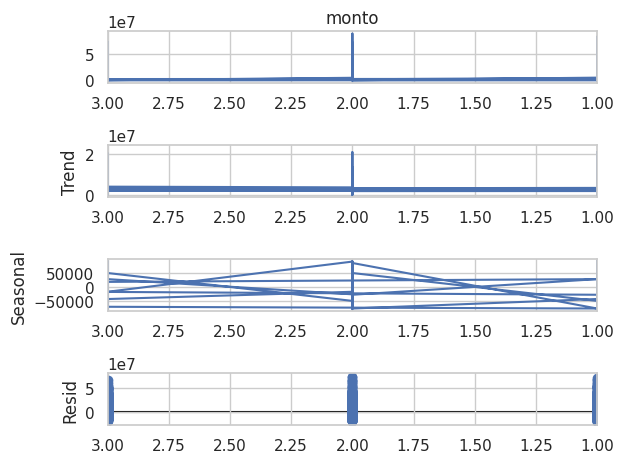

In [50]:
# Análisis de patrones estacionales con descomposición estacional
from statsmodels.tsa.seasonal import seasonal_decompose


# Establece 'mes' como índice para el análisis de series temporales
dfnuevo = dfnuevo.set_index('mes')

# Descomposición estacional
result = seasonal_decompose(dfnuevo['monto'], model='additive', period=12)

# Visualiza la descomposición
result.plot()
plt.show()

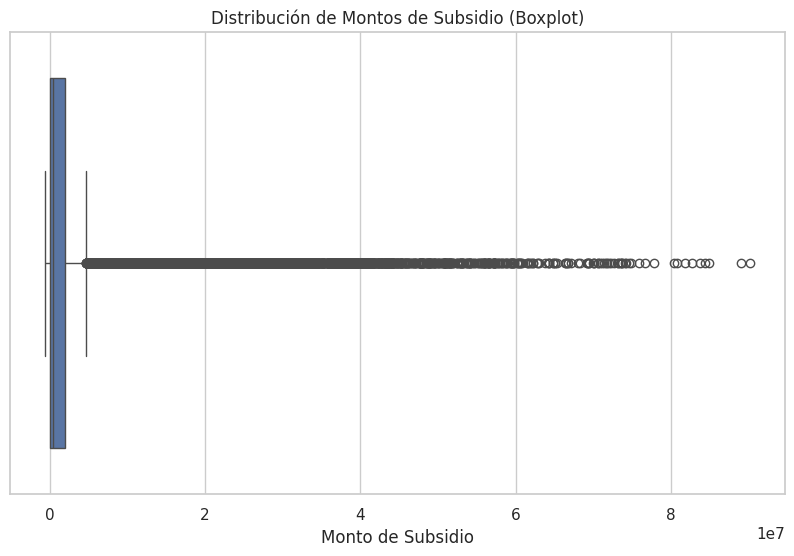

In [51]:
# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Crea un gráfico de caja para visualizar la distribución de montos
plt.figure(figsize=(10, 6))
sns.boxplot(x=dfnuevo['monto'])
plt.xlabel('Monto de Subsidio')
plt.title('Distribución de Montos de Subsidio (Boxplot)')
plt.show()

In [52]:
# Estadísticas descriptivas para la columna 'monto'
descriptive_stats = dfnuevo['monto'].describe()

# Visualiza las estadísticas descriptivas
print(descriptive_stats)

count    5.949800e+04
mean     2.631312e+06
std      6.566166e+06
min     -5.730356e+05
25%      4.840447e+04
50%      3.637590e+05
75%      1.922056e+06
max      9.012292e+07
Name: monto, dtype: float64


In [54]:
# Calcula el rango intercuartílico (IQR)
Q1 = dfnuevo['monto'].quantile(0.25)
Q3 = dfnuevo['monto'].quantile(0.75)
IQR = Q3 - Q1

# Define los límites para identificar outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identifica valores atípicos
outliers = dfnuevo[(dfnuevo['monto'] < lower_limit) | (dfnuevo['monto'] > upper_limit)]

# Visualiza los valores atípicos
print(outliers)

              cuit            provincia                    municipio  \
mes                                                                    
3    30-54633296-5         BUENOS AIRES           ESTEBAN ECHEVERRIA   
3    30-68013871-7         BUENOS AIRES                   LA MATANZA   
3    30-54624786-0         BUENOS AIRES                     LA PLATA   
3    30-70949454-2         BUENOS AIRES              LOMAS DE ZAMORA   
3    30-71521580-9         BUENOS AIRES              LOMAS DE ZAMORA   
..             ...                  ...                          ...   
1    30-57176826-3             SANTA FE                     SANTA FE   
1    30-70778883-2             SANTA FE                     SANTA FE   
1    30-70778883-2  SANTIAGO DEL ESTERO  SANTIAGO DEL ESTERO CAPITAL   
1    30-70985916-8              TUCUMAN                         PROV   
1    30-71002307-3              TUCUMAN                         PROV   

           monto             tipo   año  
mes                  

In [58]:
# Agrupa por provincia, municipio y mes, y suma los montos
subsidios_por_provincia_municipio_mes = df.groupby(['provincia', 'municipio', 'mes'])['monto'].sum().reset_index()

# Visualiza el resumen de montos por provincia, municipio y mes
print(subsidios_por_provincia_municipio_mes)

         provincia              municipio        mes        monto
0     BUENOS AIRES        ALMIRANTE BROWN 2017-01-01  29028000.30
1     BUENOS AIRES        ALMIRANTE BROWN 2017-02-01  28861823.79
2     BUENOS AIRES        ALMIRANTE BROWN 2017-03-01  28842350.03
3     BUENOS AIRES        ALMIRANTE BROWN 2017-04-01  28960401.31
4     BUENOS AIRES        ALMIRANTE BROWN 2017-05-01  29335768.12
...            ...                    ...        ...          ...
6078       TUCUMAN  SAN MIGUEL DE TUCUMAN 2018-10-01  62660596.38
6079       TUCUMAN  SAN MIGUEL DE TUCUMAN 2018-11-01  60690156.33
6080       TUCUMAN  SAN MIGUEL DE TUCUMAN 2018-12-01  63321413.55
6081       TUCUMAN  SAN MIGUEL DE TUCUMAN 2019-01-01         0.00
6082       TUCUMAN  SAN MIGUEL DE TUCUMAN 2019-02-01         0.00

[6083 rows x 4 columns]


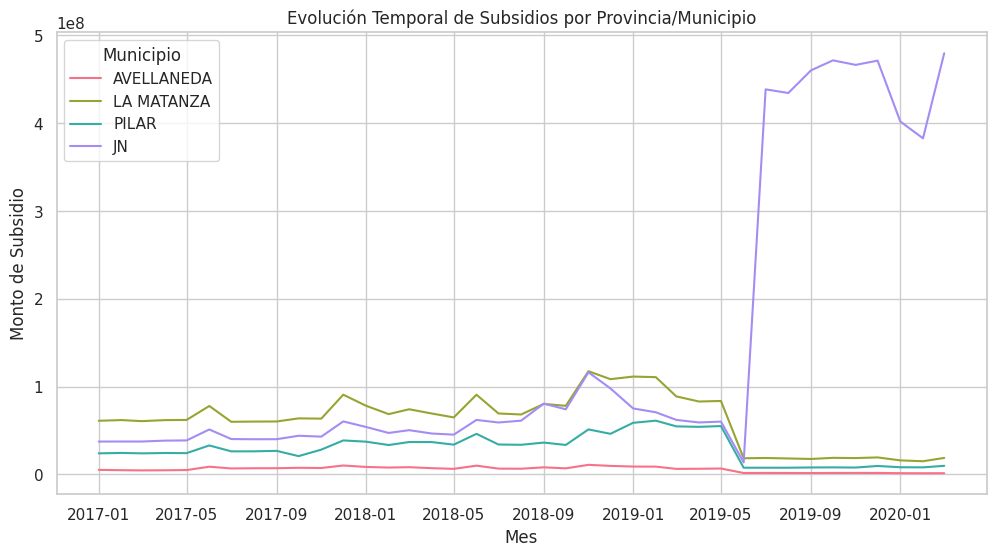

In [59]:
# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Selecciona algunas provincias y municipios para visualizar
provincias_municipios_seleccionados = subsidios_por_provincia_municipio_mes[
    (subsidios_por_provincia_municipio_mes['provincia'].isin(['BUENOS AIRES','JN'])) & 
    (subsidios_por_provincia_municipio_mes['municipio'].isin(['LA MATANZA', 'AVELLANEDA','PILAR','JN']))
]

# Crea un gráfico de líneas para mostrar la evolución temporal por provincia/municipio
plt.figure(figsize=(12, 6))
sns.lineplot(x='mes', y='monto', hue='municipio', data=provincias_municipios_seleccionados, palette="husl")
plt.xlabel('Mes')
plt.ylabel('Monto de Subsidio')
plt.title('Evolución Temporal de Subsidios por Provincia/Municipio')
plt.legend(title='Municipio')
plt.show()